# Nivell 1
#### Exercici 1
Agafa un conjunt de dades de tema esportiu que t'agradi i selecciona un atribut del conjunt de dades. Calcula el p-valor i digues si rebutja la hipòtesi nul·la agafant un alfa de 5%. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
%matplotlib inline

**Dataset**

He elegido un [dataset](https://datahub.io/sports-data/spanish-la-liga#data) de la Liga española de fútbol, temporada 20-21, los datos llegan hasta el 19-04-21

In [2]:
#Leemos dataset
df=pd.read_csv('Desktop/DataScience/datasets/liga/SP1new.csv')
df=df.iloc[:,3:26]
df.head()

,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,AS,...,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A
0,Eibar,Celta,0,0,D,0,0,D,8,6,...,13,3,3,4,4,1,0,2.50,3.25,2.90
1,Granada,Ath Bilbao,2,0,H,0,0,D,4,9,...,10,1,2,3,4,0,0,2.75,3.10,2.75
2,Cadiz,Osasuna,0,2,A,0,1,A,12,6,...,21,6,2,2,2,0,0,2.80,3.00,2.75
3,Alaves,Betis,0,1,A,0,0,D,7,11,...,17,6,4,3,3,0,0,2.80,3.20,2.60
4,Valladolid,Sociedad,1,1,D,1,0,H,8,8,...,17,5,3,4,1,0,0,2.80,3.20,2.60


**Columnas:**
1. Div = League Division
2. Date = Match Date (dd/mm/yy)
3. Time = Time of match kick off
4. HomeTeam = Home Team
5. AwayTeam = Away Team
6. FTHG = Full Time Home Team Goals
7. FTAG = Full Time Away Team Goals
8. FTR  = Full Time Result (H=Home Win, D=Draw, A=Away Win)
9. HTHG = Half Time Home Team Goals
10. HTAG = Half Time Away Team Goals
11. HTR = Half Time Result (H=Home Win, D=Draw, A=Away Win)
12. HS = Home Team Shots
13. AS = Away Team Shots
14. HST = Home Team Shots on Target
15. AST = Away Team Shots on Target
16. HF = Home Team Fouls Committed
17. AF = Away Team Fouls Committed
18. HC = Home Team Corners
19. AC = Away Team Corners
20. HY = Home Team Yellow Cards
21. AY = Away Team Yellow Cards
22. HR = Home Team Red Cards
23. AR = Away Team Red Cards
24. B365H = Bet365 home win odds
25. B365D = Bet365 draw odds
26. B365A = Bet365 away win odds

**Propuesta:**

En los últimos años, el Getafe es acusado por sus rivales de bordear los límites del reglamento y hacer faltas para detener el juego del contrario. Vamos a ver si estadísticamente el número de faltas que comete está en la media de los equipos de la Liga o si realmente estos últimos tienen razones para quejarse.

En primer lugar extraemos las faltas que cada equipo comete.

In [3]:
#extraemos la columna HF, partidos faltas casa
partidos_casa=df[['HomeTeam','HF']]
partidos_casa.columns=['Equipo','Falta'] #renombramos features

In [4]:
#extraemos la columna AF, partidos faltas visitante
partidos_fuera=df[['AwayTeam','AF']]
partidos_fuera.columns=partidos_casa.columns

In [5]:
#Concatenamos los partidos de casa y de fuera para tener las faltas que cada equipo comete
faltas=pd.concat([partidos_casa,partidos_fuera],axis=0)
faltas.head()

,Equipo,Falta
0,Eibar,17
1,Granada,8
2,Cadiz,14
3,Alaves,19
4,Valladolid,15


In [6]:
#Nuestra muestra serían las faltas cometidas por el Getafe
sample=faltas.loc[faltas.Equipo=='Getafe',:]
media=sample.Falta.mean()
print('media',np.round(media,2))
print('n muestra',len(sample.Falta))

media 16.74
n muestra 31


In [7]:
#Calculamos media y desviación estandar de las faltas de la población
u=faltas.Falta.mean()
desv=faltas.Falta.std()
np.round(u,2),np.round(desv,2)

(13.36, 4.18)

**Hipótesis:**

Tenemos los siguientes datos:

- $\mu$ = 13.36 (<i>Population Mean</i>)   
- $\sigma$ = 4.18 (<i>Population Standard Deviation</i>)   
- $\bar{x}$ = 16.74 (<i>Sample Mean</i>)   
- $n$ = 31 (<i>Sample Size</i>) 
- $alpha$ = 0.05 (doble cola)


Conocemos la media y la desviación de la población y nuestra muestra tiene un comportamiento aproximadamente normal como se muestra en el gráfico Q-Q inferior, además tiene más de 30 elementos, por lo que podemos usar Z-test.

La hipótesis es:
- $(\:H_0\:)\:$ $=$ 13.36
- $(\:H_1\:)\:$ $\neq$ 13.36  
 

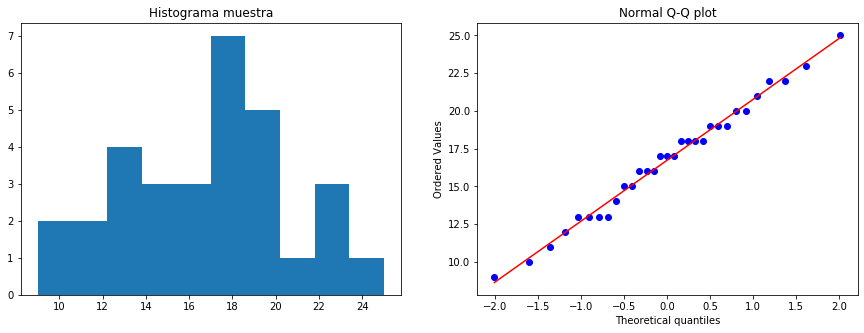

In [8]:
#comprobamos el comportamiento normal de la muestra
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.hist(sample['Falta'])
plt.title('Histograma muestra')
plt.subplot(1,2,2)
st.probplot(sample['Falta'], dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

In [9]:
#Standard error y estadístico z_value
alpha=0.05
SE=desv/np.sqrt(len(sample))
z_value=(media-u)/SE
print('z_value:',np.round(z_value,2))

z_value: 4.5


In [10]:
#Para alpha=0.05 (0.025 doble cola) tenemos Z
Z=st.norm.ppf(1-alpha/2) #doble cola
print('Z:',np.round(Z,2))

Z: 1.96


Rechazamos H0 si p-value<0.025. Es lo mismo que si tenemos z_value>Z

In [11]:
if z_value>Z:
    print('Rechazamos H0 y aceptamos H1')
else:
    print('Aceptamos HO y rechazamos H1')

Rechazamos H0 y aceptamos H1


Haciéndolo por p_value comprobamos que obtenemos lo mismo:

In [12]:
#p-value
p_value = st.norm.sf(abs(z_value))
print('p-value:',p_value)

p-value: 3.374010935851632e-06


In [13]:
if p_value<(alpha/2):
    print('Rechazamos H0 y aceptamos H1')
else:
    print('Aceptamos HO y rechazamos H1')

Rechazamos H0 y aceptamos H1


Podemos confirmar que estadísticamente el **Getafe tiene un comportamiento distinto a la media de equipos de la Liga respecto a las faltas realizadas**.

# Nivell 2
#### Exercici 2

Continua amb el conjunt de dades de tema esportiu que t'agradi i selecciona dos atributs del conjunt de dades. Calcula el p-valor i digues si rebutja la hipòtesi nul·la agafant un alfa de 5%.

**Propuesta:**

Desde la pandemia se dice que la falta de público en los campos de fútbol ha hecho que el factor campo no tenga importancia en el resultado final y que los equipos visitantes juegan como si fueran locales. Vamos a mirar si los goles que marca el equipo local y el equipo visitante son de media similares o si son estadísticamente distintos.

In [14]:
goles_casa=df.FTHG
goles_visitante=df.FTAG

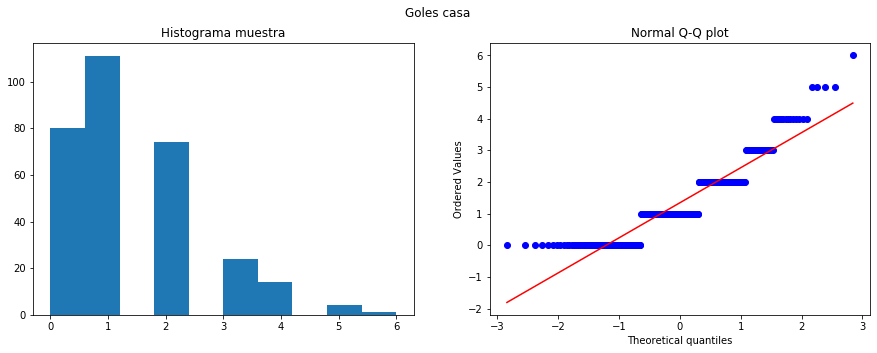

In [15]:
#comprobamos el comportamiento normal de la muestra
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.hist(goles_casa)
plt.title('Histograma muestra')
plt.subplot(1,2,2)
st.probplot(goles_casa, dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.suptitle('Goles casa')
plt.show()

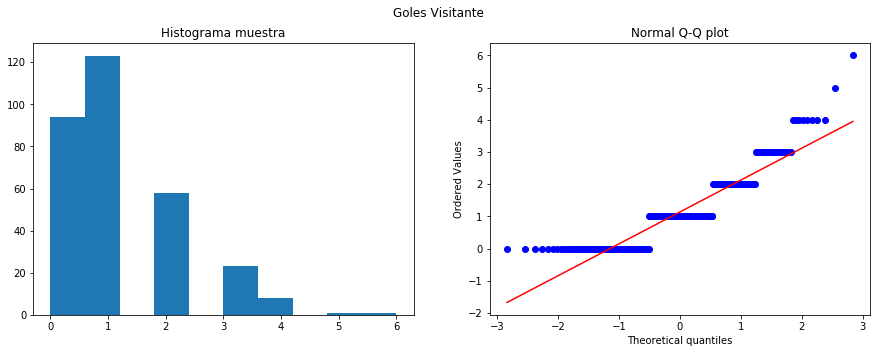

In [16]:
#comprobamos el comportamiento normal de la muestra
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.hist(goles_visitante)
plt.title('Histograma muestra')
plt.subplot(1,2,2)
st.probplot(goles_visitante, dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.suptitle('Goles Visitante')
plt.show()

Vemos que siguen una distribución normal aunque con algunos outliers

In [17]:
#x1 y x2 muestrales
x1,x2=goles_casa.mean(),goles_visitante.mean()
np.round(x1,2),np.round(x2,2)

(1.34, 1.14)

In [18]:
#s1 y s2 muestrales
s1,s2=goles_casa.std(), goles_visitante.std()
np.round(s1,2),np.round(s2,2)

(1.18, 1.07)

In [19]:
#n1 y n2
n1,n2=len(goles_casa),len(goles_visitante)
n1,n2

(308, 308)

Probamos si son muestras independientes con el test Chi-Cuadrado

In [20]:
from scipy.stats import chi2_contingency

table = pd.crosstab(goles_casa,goles_visitante)
stat, p, dof, expected = chi2_contingency(table)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')

stat=25.275, p=0.909
Probably independent


**Hipótesis:**

Tenemos los siguientes datos:
  
- Muestras independientes
- $\bar{x}$<sub>1</sub> = 1.34 (<i>Sample Mean goles casa</i>) 
- $\bar{x}$<sub>2</sub> = 1.14 (<i>Sample Mean goles visitante</i>) 
- s<sub>1</sub> = 1.18
- s<sub>2</sub> = 1.07
- $n$<sub>1</sub> = 308 (<i>Sample Size</i>) 
- $n$<sub>2</sub> = 308 (<i>Sample Size</i>)
- $alpha$ = 0.05 (doble cola)


Desconocemos las desviaciones poblaciones aunque sí tenemos las muestrales, podemos usar t student pero como las muestras son tan grandes >>30 podemos aproximar por Z-test.

La hipótesis es:
- $(\:H_0\:)\:$ $:$ $\mu$<sub>1</sub>-$\mu$<sub>2</sub>=0
- $(\:H_1\:)\:$ $:$ $\mu$<sub>1</sub>-$\mu$<sub>2</sub> $\neq$ 0  
 

In [21]:
#Standard error y estadístico z_value
alpha=0.05
SE=np.sqrt(s1**2/n1 + s2**2/n2)
z_value=(x1-x2-0)/SE
print('z_value:',np.round(z_value,2))

z_value: 2.22


In [22]:
#Para alpha=0.05 (0.025 doble cola) tenemos Z
Z=st.norm.ppf(1-alpha/2) #doble cola
print('Z:',np.round(Z,2))

Z: 1.96


In [23]:
if z_value>Z:
    print('Rechazamos H0 y aceptamos H1')
else:
    print('Aceptamos HO y rechazamos H1')

Rechazamos H0 y aceptamos H1


In [24]:
#p-value
p_value = st.norm.sf(abs(z_value))
print('p-value:',p_value)

p-value: 0.013343579600912163


In [25]:
if p_value<(alpha/2):
    print('Rechazamos H0 y aceptamos H1')
else:
    print('Aceptamos HO y rechazamos H1')

Rechazamos H0 y aceptamos H1


Estadísticamente no tienen la misma media por lo que podemos confirmar que **el factor campo aún afecta al comportamiento de los equipos durante la pandemia y los equipos marcan más goles en casa que fuera.**

# Nivell 3
#### Exercici 3
Continua amb el conjunt de dades de tema esportiu que t'agradi i selecciona tres atributs del conjunt de dades. Calcula el p-valor i digues si rebutja la hipòtesi nul·la agafant un alfa de 5%.

**Propuesta:**

Vamos a comparar los tres primeros clasificados de la Liga (Barça, Madrid y Atlético) según el número de tarjetas amarillas que reciben en cada partido para comprobar si tienen un comportamiento estadístico similar o no

In [26]:
#extraemos la columna HY, tarjetas amarillas casa
partidos_casa=df[['HomeTeam','HY']]
partidos_casa.columns=['Equipo','T_Amarilla']

In [27]:
#extraemos la columna AY, tarjetas amarillas visitante
partidos_fuera=df[['AwayTeam','AY']]
partidos_fuera.columns=partidos_casa.columns

In [28]:
#Concatenamos los partidos
tarjetas=pd.concat([partidos_casa,partidos_fuera],axis=0)
tarjetas.head()

,Equipo,T_Amarilla
0,Eibar,4
1,Granada,3
2,Cadiz,2
3,Alaves,3
4,Valladolid,4


In [29]:
#Seleccionamos muestras Barça, Madrid y Atlético
sampleBarça=tarjetas.loc[tarjetas['Equipo']=='Barcelona','T_Amarilla']
sampleRMadrid=tarjetas.loc[tarjetas['Equipo']=='Real Madrid','T_Amarilla']
sampleAtletico=tarjetas.loc[tarjetas['Equipo']=='Ath Madrid','T_Amarilla']

In [30]:
#n de cada muestra
n1,n2,n3=len(sampleBarça),len(sampleRMadrid),len(sampleAtletico)
n1,n2,n3

(30, 31, 31)

In [31]:
#medias muestrales
x1,x2,x3=sampleBarça.mean(),sampleRMadrid.mean(),sampleAtletico.mean()
np.round(x1,2),np.round(x2,2),np.round(x3,2)

(1.83, 1.61, 2.61)

In [32]:
# Aunque hay ciertas diferencias vamos a considerar que las tres desviaciones son iguales
s1,s2,s3=sampleBarça.std(),sampleRMadrid.std(),sampleAtletico.std()
np.round(s1,2),np.round(s2,2),np.round(s3,2)

(1.42, 1.2, 1.48)

**Hipótesis:**

Tenemos los siguientes datos:
  
- Muestras independientes
- Misma desviación en las muestras
- $\bar{x}$<sub>1</sub> = 1.83 (<i>Sample Mean Barça</i>) 
- $\bar{x}$<sub>2</sub> = 1.61 (<i>Sample Mean R. Madrid</i>) 
- $\bar{x}$<sub>3</sub> = 2.61 (<i>Sample Mean Atlético</i>) 
- $n$<sub>1</sub> = 30 (<i>Sample Size</i>) 
- $n$<sub>2</sub> = 31 (<i>Sample Size</i>)
- $n$<sub>3</sub> = 30 (<i>Sample Size</i>)
- $alpha$ = 0.05 (doble cola)


Vamos a usar **ANOVA** para comparar las medias de los tres equipos

La hipótesis es:
- $(\:H_0\:)\:$ $:$ $\mu$<sub>1</sub>=$\mu$<sub>2</sub>=$\mu$<sub>3</sub>
- $(\:H_1\:)\:$ $:$ Al menos un par de muestras es significativamente diferente
 

In [33]:
#Podemos calcular el ANOVA directamene con f_oneway
from scipy.stats import f_oneway
stat, p = f_oneway(sampleBarça, sampleAtletico,sampleRMadrid)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.025:
    print('Probably the same distribution')
else:
    print('Probably different distributions')

stat=4.555, p=0.013
Probably different distributions


Vemos que **p-value<alpha/2** por lo que rechazamos H0 y al menos uno de los equipos es siginificativamente
distinto al resto respecto al número de tarjetas amarillas.
Mirando las medias de los tres equipos vemos que la del Atlético tiene una media más alejada de los otros dos, y es 
el equipo que tiene un comportamiento distinto en este aspecto.

**Vamos a calcular F Snedecor para ver de donde vienen estos datos**

In [34]:
n=[n1,n2,n3]
means=[x1,x2,x3]
samples=[sampleBarça,sampleRMadrid,sampleAtletico]

In [35]:
#xg es media total. Si las longitudes de las muestras son distintas hay que ponderar las medias de cada una.
xg=sum([x*y for x,y in zip(n,means)])/sum(n)
np.round(xg,2)

2.02

In [36]:
#varianza explicada
SSB=sum([x*(y-xg)**2 for x,y in zip(n,means)])
np.round(SSB,2)

17.08

In [37]:
#varianza no explicada
SSW=sum([sum((x-y)**2) for x,y in zip(samples,means)])
np.round(SSW,2)

166.88

In [38]:
#Grados de libertad
df1=len(n)-1
df2=sum(n)-len(n)
dftotal=df1+df2
df1,df2,dftotal

(2, 89, 91)

In [39]:
#F Snedecor
F=(SSB/df1)/(SSW/df2)
np.round(F,2)

4.55

In [40]:
#p_value
p_value = 1-st.f.cdf(F, df1, df2)
np.round(p_value,3)

0.013

Vemos que los valores obtenidos coinciden con el F y p_value calculados con f_oneway de la librería de scipy.stats

Aunque a simple vista no lo parezca **ANOVA y la regresión lineal son el mismo algoritmo** aplicado para fines diferentes. Me ha parecido muy interesante el uso de la regresión lineal para calcular el p-value de ANOVA usado en el notebook **"06.Foundation for inference II"** demostrando lo comentado anteriormente.

Vamos a aplicarlo en nuestro dataset

In [41]:
#Creamos un dataframe donde la columna Equipos es una variable categórica para cada una de las muestras
tarjetas2=tarjetas.loc[(tarjetas.Equipo=='Barcelona')|(tarjetas.Equipo=='Real Madrid')|(tarjetas.Equipo=='Ath Madrid'),:]
tarjetas2.Equipo.unique()

array(['Ath Madrid', 'Barcelona', 'Real Madrid'], dtype=object)

In [42]:
from statsmodels.formula.api import ols
# importamos ols para hacer la regresión lineal y le decimos que 
# T_amarilla, donde están nuestros valores de la muestra, sea la variable explicada
# y los predictores sean (Barcelona, R. Madrid y Atlético) de la variable categórica Equipo
results = ols('T_Amarilla ~ C(Equipo)', data=tarjetas2).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             T_Amarilla   R-squared:                       0.093
Model:                            OLS   Adj. R-squared:                  0.072
Method:                 Least Squares   F-statistic:                     4.555
Date:                Mon, 10 May 2021   Prob (F-statistic):             0.0131
Time:                        12:26:36   Log-Likelihood:                -157.93
No. Observations:                  92   AIC:                             321.9
Df Residuals:                      89   BIC:                             329.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    2.6129      0.246     10.624      0.000       2.124       3.102
C(Equipo)[T.Barcelona]      -0.7796      0.351     -2.223      0.029      -1.476      -0.083
C(Equipo)[T.Real Madrid]    -1.0000      0.348     -2.875      0.005      -1.691      -0.309
==============================================================================
Omnibus:                        2.973   Durbin-Watson:                   2.225
Prob(Omnibus):                  0.226   Jarque-Bera (JB):                1.992
Skew:                           0.152   Prob(JB):                        0.369
Kurtosis:                       2.346   Cond. No.                         3.71
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Vemos que obtenemos el mismo estadístico F=4.555 y el p-value=0.013, también los mismos grados de libertad

In [43]:
# También podemos encontrar la bondad de ajusted de la regresión a partir de los valores de ANOVA
r2=SSB/(SSB+SSW) 
np.round(r2,3)

0.093

In [44]:
# y lo mismo con R^2 ajustada
r2_adj=1-((SSW/df2)/((SSB+SSW)/dftotal))
np.round(r2_adj,3)

0.072